<a href="https://colab.research.google.com/github/1731001/data-study/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
#데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이터 분석/타이타닉/train.csv') #모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/데이터 분석/타이타닉/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/데이터 분석/타이타닉/submission.csv') #답안지 파일

## 탐색적 자료분석 (EDA)
  ### 위에서부터 5행 보기

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


행과 열의 갯수

In [6]:
train.shape

(891, 12)

In [7]:
print(test.shape)
print(submission.shape)

(418, 11)
(418, 2)


##dataframe.info()
* 비어 있지 않은 값은 몇개인지?
  column의 type은 무엇인지?




In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##dataframe.describe()

*   숫자형 column들의 기술 통계량을 보여주는 함수
*   기술 통계량: 해당 column을 대표할 수 있는 통계값들을 의미



In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##Series.value_counts()

*   series 내 고유값들 각각의 개수를 보여주는 함수
*   가장 많이 나오는 고유값들 순서대로 보여줌
*   비어 있는 값은 고려하지 않는다





In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##Series.unique()

*   해당 series의 고유값들만 보여주는 함수 
*   [1,1,1,3]이라는 시리즈가 있다면, unique()함수 적용시 [1,3]이 출력
*   nan 값이 있을시 nan 값도 포함하여 출력 (Not a Number)
*   출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않다



In [12]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

##DataFreame.groupby()

*   집단에 대한 통계량 확인




In [13]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [14]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


## pd.Series.plot(kind = "bar)


*   막대 그래프
*   index 값이 x축, value값이 y축으로 대응됩나다.
*   value_counts()의 결과물을 보여줄 떄 유용합니다.
*   groupby된 결과물을 보여줄 떄 유용합니다



<Axes: xlabel='Pclass'>

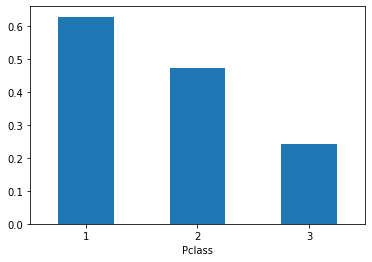

In [15]:
train.groupby('Pclass').mean()['Survived'].plot(kind = 'bar', rot = 0)

<Axes: ylabel='Frequency'>

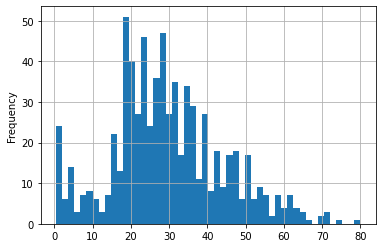

In [16]:
train['Age'].plot(kind = 'hist', bins = 50, grid = True)



*   보조선은 grid = True를 통해 추가 할 수 있습니다.



## pd.DataFrame.plot(x, y, kind = 'scatter')

*   산점도: 두 변수간의 관계를 시각화



/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Fare'>

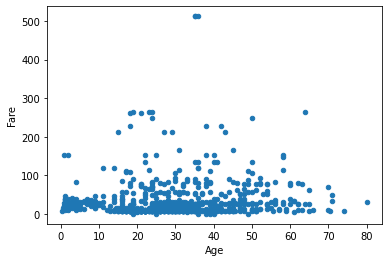

In [17]:
 train.plot(x = 'Age', y = 'Fare', kind = 'scatter')

# 데이터 전처리
Data Cleansing & Pre-Processing

## pd.Series.isna()


*   결측지 여부를 확인해줍니다.
*   결측지면 True, 아니면 False



In [18]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## pd.DataFrame.fillna()

*   결측지를 채우고자 하는 column과 결측지를 대신하여 넣고자 하는 값을 명시해주어야 한다.
*   범주형 변수일 경우, 최빈값으로 대체할 수 있다.



In [19]:
train['Age'].median()

28.0

In [20]:
train['Age'] = train['Age'].fillna(28)

In [21]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
train['Embarked'] = train['Embarked'].fillna('S')

In [24]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

##pd.Series.map

1.   시리즈 내 값을 변환 할 때 사용하는 함수



In [26]:
train ['Sex'] = train['Sex'].map({'male':0, 'female':1})

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## 변수 선택 및 모델 구축
### Feature Engineering & Initial Modeling

In [29]:
X_train = train[['Sex', 'Pclass']]
Y_train = train['Survived']

In [30]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [33]:
X_test = test[['Sex', 'Pclass']]

##sklearn.linear_model.LogisticRegression()

*   로지스틱 회귀 모형
*   0과 1사이의 값을 산출



In [35]:
lr = LogisticRegression()

##sklearn.tree.DecisionTreeClassifier()

*   의사결정 나무 모델



In [36]:
dt = DecisionTreeClassifier()

#모델 학습 및 검증
Model Tuning & Evaluation

##model.fit()

*   모델 학습



In [38]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [39]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

##model.predict()

*   모델 예측



In [40]:
lr.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

##model.predict_proba()

*   모델 예측(확률값)



In [42]:
lr.predict_proba(X_test)[:,1]

array([0.10202077, 0.59354369, 0.22475937, 0.10202077, 0.59354369,
       0.10202077, 0.59354369, 0.22475937, 0.59354369, 0.10202077,
       0.10202077, 0.42523589, 0.90484782, 0.22475937, 0.90484782,
       0.78842569, 0.22475937, 0.10202077, 0.59354369, 0.59354369,
       0.42523589, 0.10202077, 0.90484782, 0.42523589, 0.90484782,
       0.10202077, 0.90484782, 0.10202077, 0.42523589, 0.10202077,
       0.22475937, 0.22475937, 0.59354369, 0.59354369, 0.42523589,
       0.10202077, 0.59354369, 0.59354369, 0.10202077, 0.10202077,
       0.10202077, 0.42523589, 0.10202077, 0.78842569, 0.90484782,
       0.10202077, 0.42523589, 0.10202077, 0.90484782, 0.59354369,
       0.42523589, 0.22475937, 0.78842569, 0.90484782, 0.22475937,
       0.10202077, 0.10202077, 0.10202077, 0.10202077, 0.90484782,
       0.10202077, 0.22475937, 0.10202077, 0.59354369, 0.42523589,
       0.78842569, 0.59354369, 0.42523589, 0.42523589, 0.90484782,
       0.59354369, 0.10202077, 0.59354369, 0.42523589, 0.90484

In [43]:
lr_pred = lr.predict_proba(X_test)[:,1]

In [45]:
dt_pred = dt.predict_proba(X_test)[:,1]

In [47]:
submission['Survived'] = lr_pred
submission

,PassengerId,Survived
0,892,0.102021
1,893,0.593544
2,894,0.224759
3,895,0.102021
4,896,0.593544
...,...,...
413,1305,0.102021
414,1306,0.904848
415,1307,0.102021
416,1308,0.102021


##pd.DataFrame.to_csv()

*   csv파일 저장하는 함수



In [48]:
submission.to_csv('logistic_regression_pred.csv', index = False)

In [49]:
submission['Survived'] = dt_pred
submission.to_csv('decision_tree_pred.csv', index = False)